# 📊 Internship Project – Customer Segmentation with K-Means  

**Name:** Ashna Imtiaz  
**Internship:** Data Science & AI/ML Engineering Internship  
**Organization:** DevelopersHub Corporation  
**Project Title:** Customer Segmentation using K-Means Clustering  

####**Objective:** Cluster customers based on spending habits and demographics, then propose tailored marketing strategies for each segment.  

In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For machine learning and clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

This notebook is developed as part of my **Data Science & AI/ML Engineering Internship at DevelopersHub Corporation**.  
The objective of this project is to **analyze customer data, perform clustering, and propose data-driven marketing strategies**.  

### **Clustering**
- **`KMeans`**: **group customers into distinct segments** based on their spending habits.

***

### **Preprocessing**
- **`StandardScaler`**: Since K-Means is sensitive to the scale of features, so we'll use this to **standardize the data**, ensuring that all features (like annual income and spending score) contribute equally to the distance calculations.

***

### **Dimensionality Reduction**
- **`PCA`**: Use PCA to **reduce the number of features** to a manageable two or three, which makes it much easier to **visualize the clusters** in a 2D or 3D plot.
  
- **`TSNE`**: An alternative to PCA, often better for visualizing complex relationships. Use it to **create a more insightful visualization** of the clusters, especially if the data has non-linear patterns that PCA might miss.

***

### **Evaluation**
- **`silhouette_score`**: After clustering, we need to know how well our model performed. The silhouette score helps us **evaluate the quality of our clusters** by measuring how similar an object is to its own cluster compared to other clusters. It helps us determine the optimal number of clusters.

In [ ]:
df = pd.read_csv('mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##  Key Steps
1. Exploratory Data Analysis (EDA)  
2. Apply K-Means Clustering for segmentation  
3. Visualize clusters using PCA and t-SNE  
4. Derive actionable insights for marketing strategies  

In [ ]:
df.shape

(200, 5)

In [ ]:
# df.rename({'Genre': 'Gender'})

# Exploratory Data Analysis (EDA)

In [ ]:
# Check the data types and missing values
print("Data types and non-null values:")
print(df.info())

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# Get descriptive statistics of the numerical columns
print("Descriptive statistics:")
df.describe()

Descriptive statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print("\n--- Missing values ---")
print(df.isna().sum())



--- Missing values ---
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Data Visualization

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


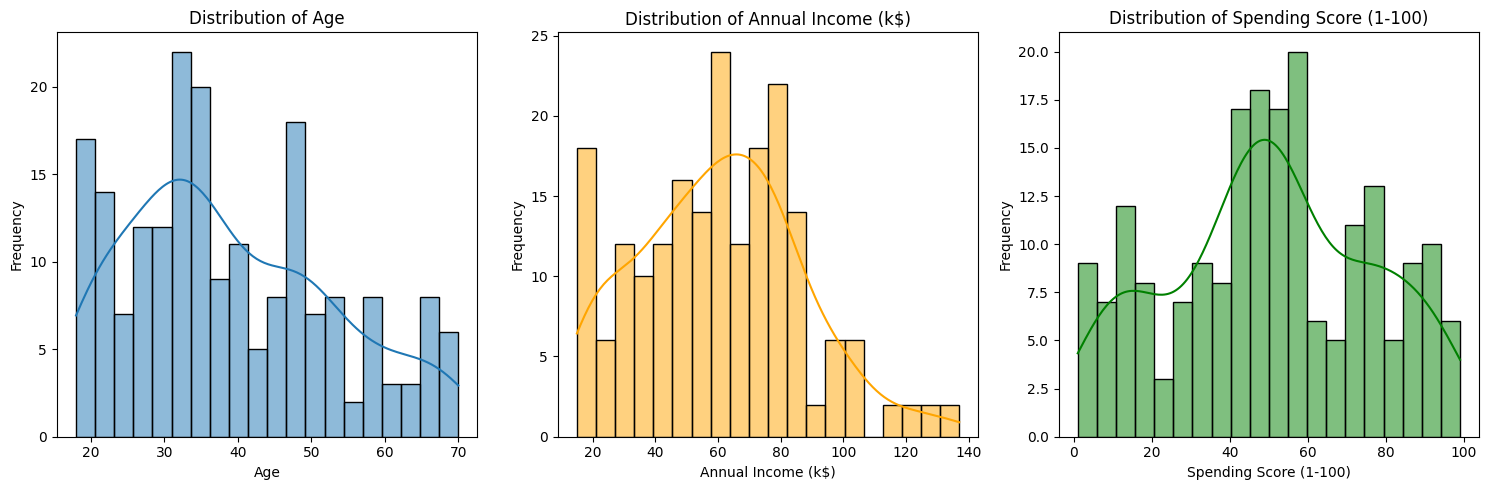

In [ ]:

# Visualize the distribution of key features
plt.figure(figsize=(15, 5))

# Distribution of Age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Distribution of Annual Income
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='orange')
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Distribution of Spending Score
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='green')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



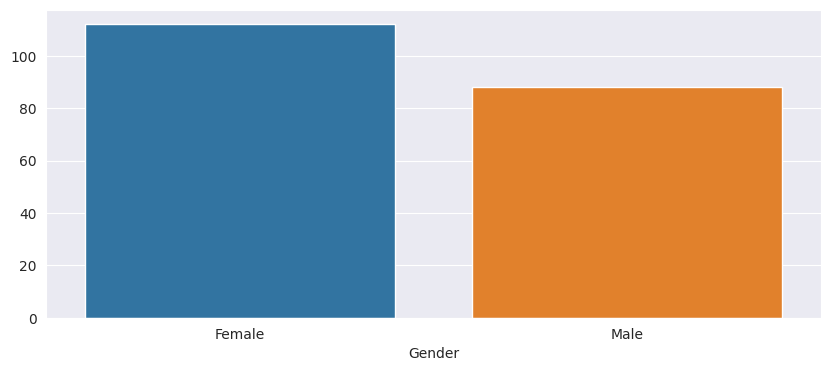

In [ ]:
df = df.rename(columns={'Genre': 'Gender'})
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


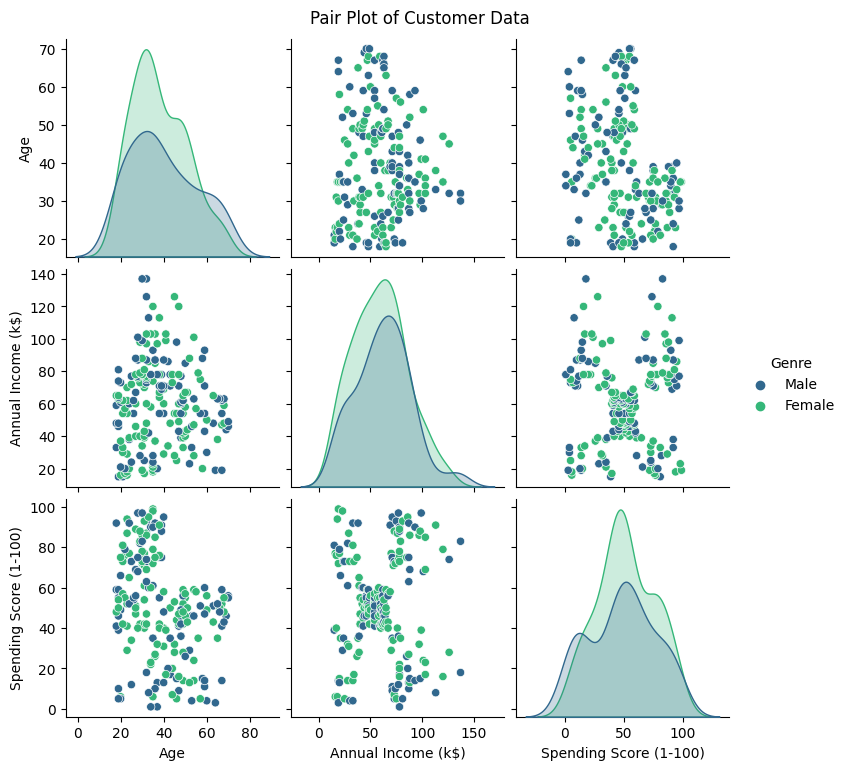

In [ ]:
# Visualize relationships between features
sns.pairplot(df.drop('CustomerID', axis=1), hue='Genre', palette='viridis')
plt.suptitle('Pair Plot of Customer Data', y=1.02)
plt.show()

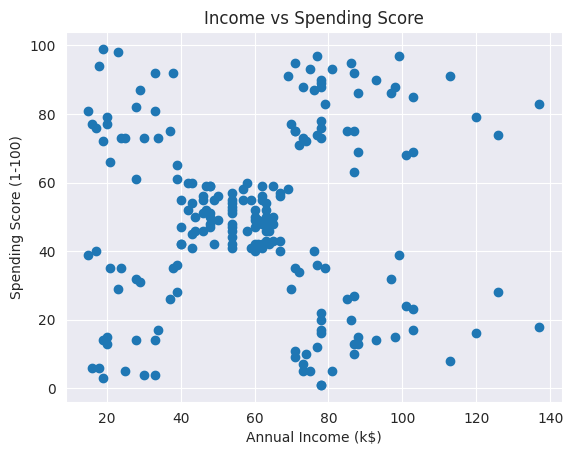

In [ ]:
# Income vs Spending quick look
plt.figure()
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title("Income vs Spending Score"); plt.xlabel("Annual Income (k$)"); plt.ylabel("Spending Score (1-100)")
plt.show()


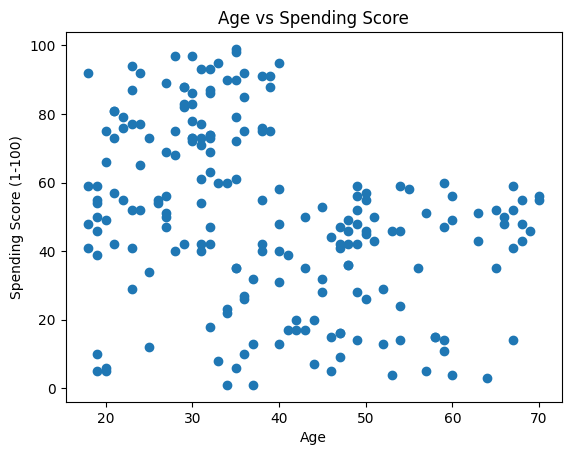

In [ ]:
plt.figure()
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score")
plt.show()


## Data Preprocessing

In [ ]:
df = df.rename(columns={'Genre': 'Gender'})

In [ ]:
# Drop ID, encode Genre if present
work = df.copy()

work = work.drop(columns=['CustomerID'])


In [ ]:
work['Gender'] = work['Gender'].map({'Male': 0, 'Female': 1}).astype('float64')

## Select features for clustering

In [ ]:
feature_cols = [c for c in ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'] if c in work.columns]
X = work[feature_cols].copy()

# Scale features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find K (Elbow + Silhouette)

In [ ]:
RANDOM_STATE = 42

wcss = []
sil_scores = []
k_values = list(range(2, 11))
for k in k_values:
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init='auto')
    labels = km.fit_predict(X_scaled)
    wcss.append(km.inertia_)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Elbow Plot

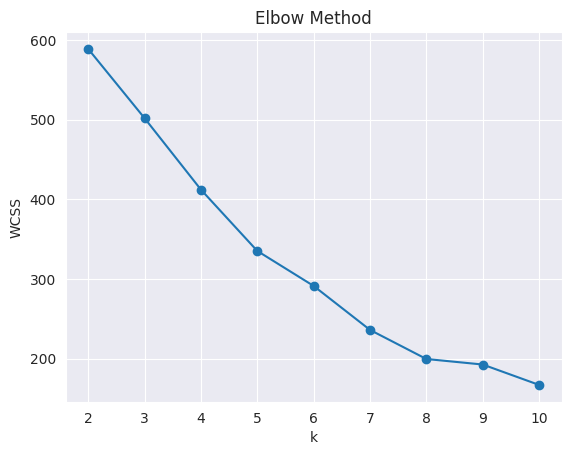

In [ ]:

plt.figure()
plt.plot(list(K_RANGE), wcss, marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


# Silhouette plot

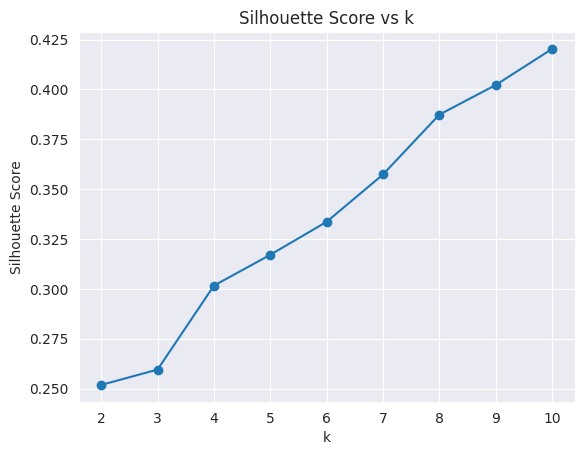

In [ ]:

plt.figure()
plt.plot(list(K_RANGE), sil_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k"); plt.ylabel("Silhouette Score")
plt.xticks(list(K_RANGE))
plt.show()

In [ ]:
best_k = k_values[int(np.argmax(sil_scores))]
print(f"\nChosen k (by silhouette): {best_k}")


Chosen k (by silhouette): 10


# Apply K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=best_k, init='k-means++', n_init='auto', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
work['Cluster'] = clusters


In [ ]:
print("\n=== Cluster Counts ===")
print(work['Cluster'].value_counts().sort_index())


=== Cluster Counts ===
Cluster
0    25
1    21
2    25
3    30
4    19
5    33
6    13
7     3
8    16
9    15
Name: count, dtype: int64


# Visualize Clusters (PCA & t-SNE)

In [ ]:
#  PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

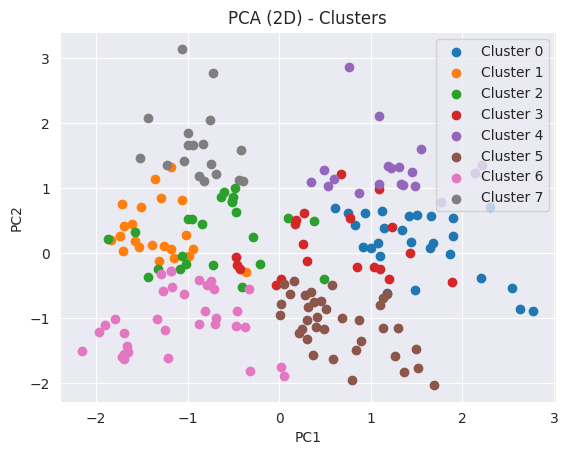

In [ ]:
plt.figure()
for c in range(best_k):
    plt.scatter(X_pca[labels == c, 0], X_pca[labels == c, 1], label=f'Cluster {c}')
plt.title("PCA (2D) - Clusters")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.show()

# t-SNE Visualization

In [ ]:
# t-SNE Visualization (2D)
# t-SNE is stochastic; results vary slightly; works fine on this small dataset
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

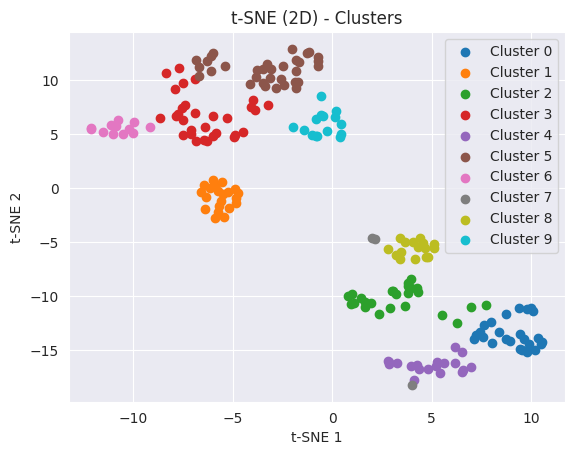

In [ ]:
plt.figure()
for c in range(best_k):
    plt.scatter(X_tsne[labels == c, 0], X_tsne[labels == c, 1], label=f'Cluster {c}')
plt.title("t-SNE (2D) - Clusters")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.legend()
plt.show()

# Cluster Profiling & Marketing Strategies

In [ ]:
profile = work.groupby('Cluster').agg({
    col: ['mean', 'median'] for col in feature_cols
})
profile.columns = ['_'.join(col).strip() for col in profile.columns.values]

print("\n--- Cluster Profile (means/medians) ---")
profile


--- Cluster Profile (means/medians) ---


,Gender_mean,Gender_median,Age_mean,Age_median,Annual Income (k$)_mean,Annual Income (k$)_median,Spending Score (1-100)_mean,Spending Score (1-100)_median
Cluster,,,,,,,,
0,0.0,0.0,58.840000,59.0,47.800000,49.0,41.000000,46.0
1,1.0,1.0,32.190476,32.0,86.047619,79.0,81.666667,83.0
2,0.0,0.0,25.720000,24.0,40.400000,42.0,59.000000,56.0
3,1.0,1.0,28.533333,28.5,51.433333,57.5,43.033333,42.0
4,0.0,0.0,39.894737,42.0,82.421053,78.0,13.842105,12.0
5,1.0,1.0,52.575758,50.0,47.484848,48.0,42.242424,47.0
6,1.0,1.0,25.461538,23.0,25.692308,23.0,80.538462,77.0
7,0.0,0.0,31.333333,32.0,133.333333,137.0,58.333333,74.0
8,0.0,0.0,33.562500,33.0,81.562500,78.0,83.187500,89.0


In [ ]:
overall_means = X.mean()

def describe_cluster(row_means):
    desc = []
    if 'Annual Income (k$)' in row_means:
        if row_means['Annual Income (k$)'] > overall_means['Annual Income (k$)']:
            desc.append("higher income")
        else:
            desc.append("lower income")
    if 'Spending Score (1-100)' in row_means:
        if row_means['Spending Score (1-100)'] > overall_means['Spending Score (1-100)']:
            desc.append("higher spending")
        else:
            desc.append("lower spending")
    if 'Age' in row_means:
        if row_means['Age'] > overall_means['Age']:
            desc.append("older")
        else:
            desc.append("younger")
    if 'Genre' in row_means:
        if row_means['Genre'] >= 0.5:
            desc.append("more female")
        else:
            desc.append("more male")
    return ", ".join(desc)

In [ ]:
def strategy_for_cluster(row_means):
    income = row_means.get('Annual Income (k$)', overall_means.get('Annual Income (k$)', 0))
    spend  = row_means.get('Spending Score (1-100)', overall_means.get('Spending Score (1-100)', 0))
    age    = row_means.get('Age', overall_means.get('Age', 0))

    strategies = []

    if income >= overall_means.get('Annual Income (k$)', 0) and spend >= overall_means.get('Spending Score (1-100)', 0):
        strategies.append("Premium loyalty perks, exclusive previews, early access")
        strategies.append("Upsell premium bundles and memberships")
    elif income < overall_means.get('Annual Income (k$)', 0) and spend >= overall_means.get('Spending Score (1-100)', 0):
        strategies.append("Targeted discounts, coupons, value bundles")
        strategies.append("Seasonal promotions to sustain engagement")
    elif income >= overall_means.get('Annual Income (k$)', 0) and spend < overall_means.get('Spending Score (1-100)', 0):
        strategies.append("Personalized recommendations, concierge support")
        strategies.append("Awareness campaigns highlighting benefits/quality")
    else:
        strategies.append("Entry-level offers, free trials, referral bonuses")
        strategies.append("Price-led messaging and essentials bundles")

    if age and age < overall_means.get('Age', age):
        strategies.append("Leverage social media campaigns and mobile-first journeys")
    else:
        strategies.append("Email newsletters and value-focused messaging")

    return strategies




In [ ]:
print("\n--- Marketing Strategies by Cluster ---")
for c in range(best_k):
    row = profile.loc[c]
    # Map back to simple means
    means = {
        col: row[f"{col}_mean"] for col in feature_cols
    }
    summary = describe_cluster(means)
    strat = strategy_for_cluster(means)
    print(f"\nCluster {c} → {summary}")
    for s in strat:
        print(f" - {s}")


--- Marketing Strategies by Cluster ---

Cluster 0 → lower income, lower spending, older
 - Entry-level offers, free trials, referral bonuses
 - Price-led messaging and essentials bundles
 - Email newsletters and value-focused messaging

Cluster 1 → higher income, higher spending, younger
 - Premium loyalty perks, exclusive previews, early access
 - Upsell premium bundles and memberships
 - Leverage social media campaigns and mobile-first journeys

Cluster 2 → lower income, higher spending, younger
 - Targeted discounts, coupons, value bundles
 - Seasonal promotions to sustain engagement
 - Leverage social media campaigns and mobile-first journeys

Cluster 3 → lower income, lower spending, younger
 - Entry-level offers, free trials, referral bonuses
 - Price-led messaging and essentials bundles
 - Leverage social media campaigns and mobile-first journeys

Cluster 4 → higher income, lower spending, older
 - Personalized recommendations, concierge support
 - Awareness campaigns highligh

In [ ]:
# Attach cluster labels back to original data (optional)

final_out = work.loc[X.index].copy()
final_out['Cluster'] = clusters
print("\n--- Sample of labeled data ---")
final_out.head()

# Save (optional)
# final_out.to_csv("customer_segments.csv", index=False)



--- Sample of labeled data ---


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.0,19,15,39,2
1,0.0,21,15,81,2
2,1.0,20,16,6,3
3,1.0,23,16,77,6
4,1.0,31,17,40,3


In [ ]:
# Save (optional)
final_out.to_csv("customer_segments.csv", index=False)

In [ ]:

# Summarize clusters
print("\nCluster Insights & Suggested Strategies:")
for cluster in final_out['Cluster'].unique():
    cluster_data = final_out[final_out['Cluster'] == cluster]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_score = cluster_data['Spending Score (1-100)'].mean()
    print(f"Cluster {cluster}: Avg Income = {avg_income:.2f}, Avg Score = {avg_score:.2f}")

# Example strategies (you can refine later based on data)
print("\nMarketing Strategies:")
print("Cluster 0: Focus on discounts and loyalty programs.")
print("Cluster 1: Premium products and personalized services.")
print("Cluster 2: Budget-friendly promotions and awareness campaigns.")



Cluster Insights & Suggested Strategies:
Cluster 2: Avg Income = 40.40, Avg Score = 59.00
Cluster 3: Avg Income = 51.43, Avg Score = 43.03
Cluster 6: Avg Income = 25.69, Avg Score = 80.54
Cluster 0: Avg Income = 47.80, Avg Score = 41.00
Cluster 5: Avg Income = 47.48, Avg Score = 42.24
Cluster 8: Avg Income = 81.56, Avg Score = 83.19
Cluster 1: Avg Income = 86.05, Avg Score = 81.67
Cluster 4: Avg Income = 82.42, Avg Score = 13.84
Cluster 9: Avg Income = 92.33, Avg Score = 21.60
Cluster 7: Avg Income = 133.33, Avg Score = 58.33

Marketing Strategies:
Cluster 0: Focus on discounts and loyalty programs.
Cluster 1: Premium products and personalized services.
Cluster 2: Budget-friendly promotions and awareness campaigns.
